# COMP4605.1 Data Mining Project

In this project, I will try to answer some questions by using the data that gives the distribution of death rates between 2009-2017 by diseases, sex, age and place of residence.

Another point I will investigate is to examine the relationship between alcohol use and mortality.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

Data:I used 4 different datasets in this project. The first shows the distribution of 90 different diseases by gender from 2009 to 2017.

In [81]:
data1 = pd.read_excel('deathReasonWithGender(2009-).xls', delimiter='\n')
data1 = data1.set_axis(data1['Ölüm nedeni'])
data1.drop('Ölüm nedeni', inplace=True, axis=1)
data1.head()

,Toplam(2009),Erkek(2009),Kadın(2009),Toplam(2010),Erkek(2010),Kadın(2010),Toplam(2011),Erkek(2011),Kadın(2011),Toplam(2012),...,Kadın(2014),Toplam(2015 ),Erkek(2015 ),Kadın(2015 ),Toplam(2016 ),Erkek(2016 ),Kadın(2016 ),Toplam(2017 ),Erkek(2017 ),Kadın(2017 )
Ölüm nedeni,,,,,,,,,,,,,,,,,,,,,
Tüm nedenler,281504,155928.0,125576.0,294501,161734.0,132767.0,312249,171734.0,140515.0,320967,...,174747.0,397037,215977.0,180994.0,420189,228954.0,191170.0,423878,231075.0,192744.0
Enfeksiyon ve parazit hastalıkları\n,4549,2573.0,1976.0,4919,2732.0,2187.0,5042,2738.0,2304.0,5604,...,3176.0,8328,4307.0,4021.0,8624,4494.0,4130.0,10248,5205.0,5042.0
İshal ve gastroenterit,63,25.0,38.0,45,23.0,22.0,190,82.0,108.0,235,...,273.0,428,171.0,257.0,377,157.0,220.0,352,151.0,201.0
Tüberküloz,808,556.0,252.0,710,505.0,205.0,719,510.0,209.0,622,...,167.0,534,370.0,164.0,548,382.0,166.0,481,343.0,137.0
Meningokok enfeksiyonları,15,6.0,9.0,21,11.0,10.0,14,11.0,3.0,15,...,9.0,19,9.0,10.0,30,14.0,16.0,18,8.0,10.0


Data: Secondly, the scope of the data I used is the distribution of each of these diseases according to the provinces.

In [3]:
data2 = pd.read_excel('deathReasonWithPermanentResidence(2009-).xls', delimiter='\n')
data2 = data2.set_axis(data2['Daimi ikametgah'])
data2.drop('Daimi ikametgah', inplace=True, axis=1)
data2.head()

,Dolaşım sistemi hastalıkları(2009),İyi huylu ve kötü huylu tümörler(2009),Solunum sistemi hastalıkları(2009),Sinir sistemi ve duyu organları hastalıkları(2009),"Endokrin (iç salgı bezi), beslenme ve metabolizmayla ilgili hastalıklar(2009)",Dışsal yaralanma nedenleri ve zehirlenmeler(2009),Diğer(2009),Dolaşım sistemi hastalıkları\n(2010),İyi huylu ve kötü huylu tümörler (2010),Solunum sistemi hastalıkları\n(2010),...,"Endokrin (iç salgı bezi), beslenme ve metabolizmayla ilgili hastalıklar(2016)",Dışsal yaralanma nedenleri ve zehirlenmeler(2016),Diğer(2016),Dolaşım sistemi hastalıkları(2017),İyi huylu ve kötü huylu tümörler(2017),Solunum sistemi hastalıkları(2017),Sinir sistemi ve duyu organları hastalıkları (2017),"Endokrin (iç salgı bezi), beslenme ve metabolizmayla ilgili hastalıklar\n(2017)",Dışsal yaralanma nedenleri ve zehirlenmeler\n(2017),Diğer\n(2017)
Daimi ikametgah,,,,,,,,,,,,,,,,,,,,,
Adana,2449,1286,460,170,505,217,1143,2738,1485,445,...,454,729,1475,4315,1915,1093,612,401,648,1302
Adıyaman,571,205,112,23,73,48,335,648,254,131,...,146,123,384,1046,338,317,89,119,94,372
Afyonkarahisar,1394,599,410,107,269,96,562,1389,656,416,...,239,290,598,2254,758,581,185,184,283,572
Ağrı,243,127,95,14,28,40,199,281,142,75,...,71,128,333,566,358,246,45,74,132,312
Amasya,689,312,116,53,138,67,242,677,385,148,...,83,90,260,1123,440,256,122,124,95,261


Data: Here, we have the distribution of each of the diseases in terms of age and gender.

In [82]:
data3 = pd.read_excel('deathResonWithGenderandAge(2009-).xls',delimiter='-')
data3 = data3.set_axis(data3['Ölüm nedeni'])
data3.drop('Ölüm nedeni', inplace=True, axis=1)
data3.head()

,0 - 14(2009),15 - 24(2009),25 - 34(2009),35 - 44(2009),45 - 54(2009),55 - 64(2009),65 - 74(2009),75 - 84(2009),85+(2009),Unknown(2009),...,0 - 14(2017),15 - 24(2017),25 - 34(2017),35 - 44(2017),45 - 54(2017),55 - 64(2017),65 - 74(2017),75 - 84(2017),85+(2017),Unknown(2017)
Ölüm nedeni,,,,,,,,,,,,,,,,,,,,,
Toplam,17825,3682,5031,9369,22973,39693,60509,88981,32406,1035.0,...,20087,5839,6732,11674,26063,55209,85141,123180,89851,102.0
ToplamErkek,9768,2412,3241,6020,15661,26722,35918,43885,11531,770.0,...,11117,4363,4772,7480,17430,37671,52355,62518,33287,82.0
ToplamKadın,8057,1270,1790,3349,7312,12971,24591,45096,20875,265.0,...,8922,1474,1960,4194,8631,17538,32786,60661,56564,14.0
Dolaşım sistemi hastalıklarıToplam,828,336,734,2436,7616,14296,24983,43228,17631,70.0,...,546,410,793,2892,8698,19367,33280,55704,45568,7.0
Dolaşım sistemi hastalıklarıErkek,419,183,442,1656,5371,9462,13848,19352,5674,40.0,...,264,272,529,1975,6281,13370,19483,25825,15387,6.0


Data: Finally, we have a bit different dataset from previous ones, Because here, we have the distribution of alcohol usage as rage of age and gender.
I have thought that i can merge some attributes that can be common for following one and previous datasets.

In [5]:
data4 = pd.read_excel('AlcholUsage.xls')
data4 = data4.set_axis(data4['Stage'])
data4.drop('Stage', inplace=True, axis=1)
data4.head()

,Toplam(2010),Erkek(2010),Kadın(2010),Toplam(2012),Erkek(2012),Kadın(2012),Toplam(2014),Erkek(2014,Kadın(2014,Toplam(2016),Erkek(2016),Kadın(2016),Toplam(2019),Erkek(2019),Kadın(2019)
Stage,,,,,,,,,,,,,,,
Kullanan\nConsumes,12.630236,21.144457,4.416159,10.422521,17.239486,3.807515,14.928641,24.291613,5.791797,12.228066,19.329901,5.283493,14.859799,23.309798,6.607520
15-24,8.602875,14.652591,2.823432,7.390596,11.674665,3.191824,13.347076,20.916990,5.773440,9.270746,13.080058,5.406409,11.379090,16.368841,6.248088
25-34,16.970690,26.431888,7.468143,13.968774,21.720531,6.163399,20.525507,31.007117,9.956023,16.457600,24.130715,8.714705,20.693229,30.947662,10.478067
35-44,15.649923,25.474136,5.723799,13.091358,21.173312,4.952246,17.097931,27.394430,6.690199,15.850923,25.180696,6.444582,19.770272,30.754391,8.682305
45-54,13.741046,23.600679,3.838316,11.908465,20.300846,3.470030,15.213327,25.625657,4.678356,11.519627,19.218946,3.724644,14.152611,22.239190,6.007879


q1:In which city, for what reason and in which age group the most deaths occur in Turkey?

In [88]:
data = data3.iloc[3:21,:]
maxs = 0
for i in range(data.shape[1]):
    
    x = data[data.columns[i]].values.max() 
    if x > maxs:
        maxs=x
        
for row1 in data.index: # df is the DataFrame
         for col1 in data.columns:
             if data._get_value(row1,col1) == maxs:
                print("When we consider the range of ages, we can obtain ",maxs," death in ",col1)
                print("And the deaths are caused by ",row1.split('Toplam')[0])
                break


When we consider the range of ages, we can obtain  57113  death in  75 - 84(2016)
And the deaths are caused by  Dolaşım sistemi hastalıkları


In [95]:
x = pd.DataFrame(data2.describe().loc['max']).max()  #max number of death of between diseases
print("Here, i was tried to obtain the disease that causes the most death ")
print("This disease is caused ",x[0],"death")
k = pd.DataFrame(data2.describe().loc['max'])   #max number of death of each diseases
v = k[k['max']==x[0]].index.tolist()[0]
print('The disease from which this highest number of deaths we found is ',v.split('(2016)')[0]) 
print('Lastly, we can also obtain that this number is occured in',data2[data2[v]==x[0]].index.tolist()[0])


Here, i was tried to obtain the disease that causes the most death 
This disease is caused  21459.0 death
The disease from which this highest number of deaths we found is  Dolaşım sistemi hastalıkları
Lastly, we can also obtain that this number is occured in İstanbul


q2:Which disease was the most effective in male and female deaths?

In [98]:
dataE = data1.iloc[1:,1::3]
maxs =0
for b in range(dataE.shape[1]):
    
    x = dataE[dataE.columns[2]].dropna().values.max()
    
    if x > maxs:
        maxs=x
        col = dataE[dataE.columns[b]]

maxs
for row in dataE.index: # df is the DataFrame
         for col in dataE.columns:
             if dataE._get_value(row,col) == maxs:
                print("Most common male deaths after 2009",maxs)
                print("Occurred in year",col.split('Erkek')[1],"and disease",row)
                
                break

Most common male deaths after 2009 60142.0
Occurred in year (2011) and disease Dolaşım sistemi hastalıkları


In [84]:
dataK = data1.iloc[1:,2::3]
dataE = data1.iloc[1:,1::3]
maxs =0
for b in range(dataK.shape[1]):
    
    x = dataK[dataK.columns[b]].dropna().values.max()
    
    if x > maxs:
        maxs=x
        

maxs
for row in dataK.index: # df is the DataFrame
         for col in dataK.columns:
             if dataK._get_value(row,col) == maxs:
                print("Most common female deaths after 2009",maxs)
                print("Occurred in year",col.split('Kadın')[1],"and disease",row)
                
                break

Most common female deaths after 2009 83873.0
Occurred in year (2017 ) and disease Dolaşım sistemi hastalıkları


q3:What is the highest average age and gender of people who die from each disease?

In [10]:
data3e=data3.iloc[4::3,:]
maxs =0


for eachD in range(data3e.shape[0]):
    nan_array = np.isnan(data3e.iloc[eachD,:].values)
    not_nan_array = ~ nan_array
    array2 = data3e.iloc[eachD,:].values[not_nan_array]
    
    print(eachD,"->",array2.max())
    for row2 in data3e.index: # df is the DataFrame
             for col2 in data3e.columns:
                 if data3e._get_value(row2,col2)==array2.max():
                    print(row2,col2)

                    break


0 -> 26527.0
Dolaşım sistemi hastalıklarıErkek 75 - 84(2016)
1 -> 16016.0
İyi huylu ve kötü huylu tümörlerErkek 65 - 74(2017)
2 -> 10704.0
Solunum sistemi hastalıklarıErkek 75 - 84(2016)
3 -> 3337.0
Sinir sistemi ve duyu organları hastalıklarıErkek 75 - 84(2016)
4 -> 2714.0
Endokrin (iç salgı bezi), beslenme ve metabolizmayla ilgili hastalıklarErkek 75 - 84(2011)
5 -> 2747.0
Dışsal yaralanma nedenleri ve zehirlenmelerErkek 25 - 34(2016)


In [11]:
data3k=data3.iloc[5::3,:]

for eachK in range(data3k.shape[0]):
    nan_array = np.isnan(data3k.iloc[eachK,:].values)
    not_nan_array = ~ nan_array
    array2 = data3k.iloc[eachK,:].values[not_nan_array]
    
    print(eachK,"->",array2.max())
    for row2 in data3k.index: # df is the DataFrame
             for col2 in data3e.columns:
                 if data3k._get_value(row2,col2)==array2.max():
                    print(row2,col2)

                    break

0 -> 30585.0
Dolaşım sistemi hastalıklarıKadın 75 - 84(2016)
1 -> 7044.0
İyi huylu ve kötü huylu tümörlerKadın  65 - 74(2017)
2 -> 7870.0
Solunum sistemi hastalıklarıKadın  75 - 84(2017)
3 -> 5170.0
Sinir sistemi ve duyu organları hastalıklarıKadın  85+(2017)
4 -> 4414.0
Endokrin (iç salgı bezi), beslenme ve metabolizmayla ilgili hastalıklarKadın 75 - 84(2011)
5 -> 1116.0
Dışsal yaralanma nedenleri ve zehirlenmelerKadın 75 - 84(2014)


h1:The higher the alcohol consumption, the lower the age range of those who died.

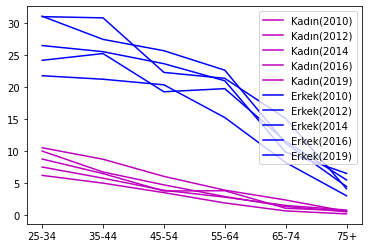

In [12]:
newDk = data4.iloc[1:8,2::3]
for ck in range(newDk.shape[1]):
         plt.plot(newDk.iloc[1:8,ck:ck+1],label=newDk.columns[ck],c='m')
         plt.legend()
newDe = data4.iloc[1:8,1::3]
for cl in range(newDe.shape[1]):
         plt.plot(newDe.iloc[1:8,cl:cl+1],label=newDe.columns[cl],c='b')
         plt.legend()

From this graph, we can find out that men, regardless of age, use more alcohol.

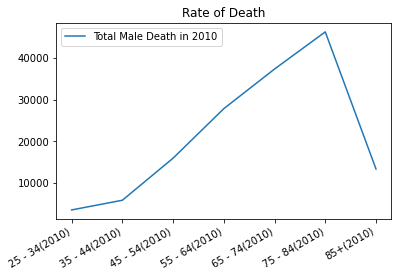

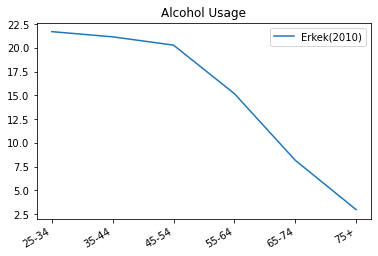

In [13]:
q3D=data3.iloc[1:2,:]
q3D = q3D.drop(q3D.iloc[:,9::10].columns, axis=1)
xval = np.array(q3D.iloc[0][q3D.columns[11]:q3D.columns[17]].index)
yval = np.array(q3D.iloc[0][q3D.columns[11]:q3D.columns[17]].values)



fig = plt.figure()
plt.plot(xval,yval,label='Total Male Death in 2010')
plt.title('Rate of Death')
plt.legend()
fig.autofmt_xdate()
fig = plt.figure()
plt.plot(newDe.iloc[1:8,1:2],label=newDe.columns[0])
plt.title('Alcohol Usage')
plt.legend()
fig.autofmt_xdate()


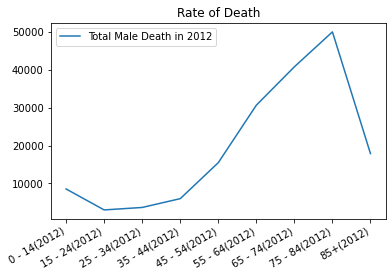

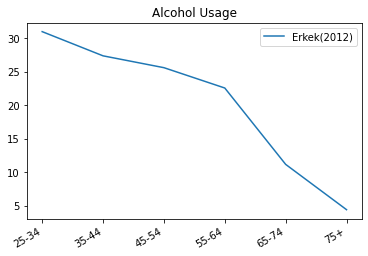

In [14]:
xval = np.array(q3D.iloc[0][q3D.columns[27]:q3D.columns[35]].index)
yval = np.array(q3D.iloc[0][q3D.columns[27]:q3D.columns[35]].values)
fig = plt.figure()

plt.plot(xval,yval,label='Total Male Death in 2012')
plt.title('Rate of Death')
plt.legend()
fig.autofmt_xdate()
fig = plt.figure()
plt.plot(newDe.iloc[1:8,2:3],label=newDe.columns[1])
plt.title('Alcohol Usage')
plt.legend()
fig.autofmt_xdate()

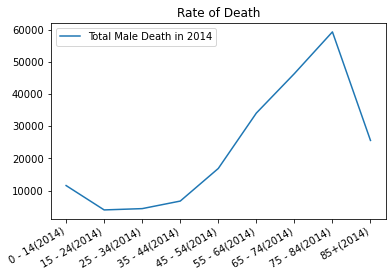

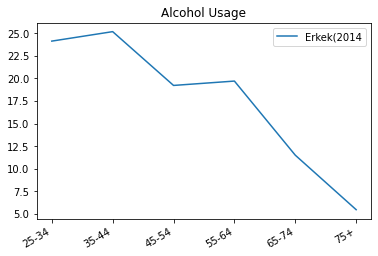

In [15]:
xval = np.array(q3D.iloc[0][q3D.columns[45]:q3D.columns[53]].index)
yval = np.array(q3D.iloc[0][q3D.columns[45]:q3D.columns[53]].values)
fig = plt.figure()

plt.plot(xval,yval,label='Total Male Death in 2014')
plt.title('Rate of Death')
plt.legend()
fig.autofmt_xdate()
fig = plt.figure()
plt.plot(newDe.iloc[1:8,3:4],label=newDe.columns[2])
plt.title('Alcohol Usage')
plt.legend()
fig.autofmt_xdate()

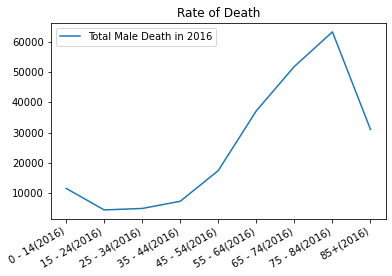

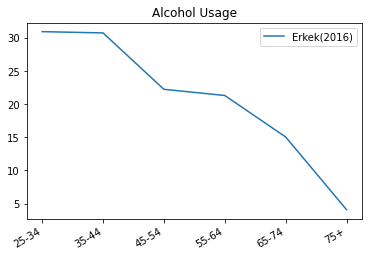

In [16]:

xval = np.array(q3D.iloc[0][q3D.columns[63]:q3D.columns[71]].index)
yval = np.array(q3D.iloc[0][q3D.columns[63]:q3D.columns[71]].values)
fig = plt.figure()

plt.plot(xval,yval,label='Total Male Death in 2016')
plt.title('Rate of Death')
plt.legend()
fig.autofmt_xdate()
fig = plt.figure()
plt.plot(newDe.iloc[1:8,4:5],label=newDe.columns[3])
plt.title('Alcohol Usage')
plt.legend()
fig.autofmt_xdate()

h2: My hypothesis is that men live longer and their mortality rate is lower than women.

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

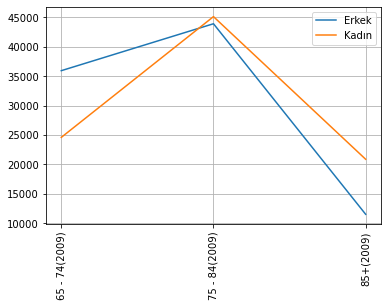

In [161]:
q3D=data3.iloc[1:2,:]
q3D = q3D.drop(q3D.iloc[:,9::10].columns, axis=1)
xval = np.array(q3D.iloc[0:,6:9].columns)
yval = np.array(q3D.iloc[0:,6:9].values).reshape(3,)
plt.plot(xval,yval,label='Erkek')
plt.legend()
plt.grid()
plt.xticks(rotation = 90)

q3K=data3.iloc[2:3,:]
q3K = q3K.drop(q3K.iloc[:,9::10].columns, axis=1)
xvaK = np.array(q3K.iloc[0:,6:9].columns)
yvaK = np.array(q3K.iloc[0:,6:9].values).reshape(3,)
plt.plot(xvaK,yvaK,label='Kadın')
plt.legend()
plt.xticks(rotation = 90)


Null Hypothesis is that Men's death rates are not higher than women's
0.020911119453109864 0.9843180889818178
Normality checking
ShapiroResult(statistic=0.9209325313568115, pvalue=0.45562544465065)
Data is not normal
we can accept the null hypothesis because we see the p-value and we can think the values by chance.


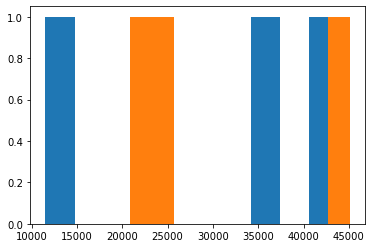

In [171]:
from scipy import stats
yval = np.array(q3D.iloc[0:,6:9].values).reshape(3,)
yvaK = np.array(q3K.iloc[0:,6:9].values).reshape(3,)
print("Null Hypothesis is that Men's death rates are not higher than women's")
score, p_value = stats.ttest_ind(yval,yvaK,equal_var=True)
print(score, p_value)
print("Normality checking")
print(stats.shapiro(yval))
print("Data is not normal")
plt.hist(yval)
plt.hist(yvaK)
print("we can accept the null hypothesis because we see the p-value and we can think the values by chance.")

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

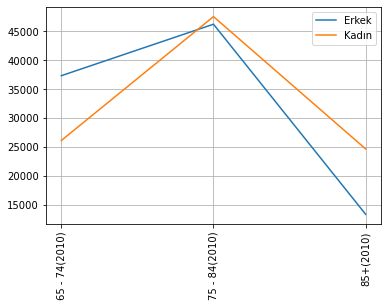

In [162]:
xvaE2 = np.array(q3D.iloc[0:,15:18].columns)
yvaE2 = np.array(q3D.iloc[0:,15:18].values).reshape(3,)
plt.plot(xvaE2,yvaE2,label='Erkek')
plt.xticks(rotation = 90)
plt.grid()
xvaK2 = np.array(q3K.iloc[0:,15:18].columns)
yvaK2 = np.array(q3K.iloc[0:,15:18].values).reshape(3,)
plt.plot(xvaK2,yvaK2,label='Kadın')
plt.legend()
plt.xticks(rotation = 90)

h3:Another hypothesis is that death rates decrease as one goes east.

In [99]:
nToe = ['Edirne','Çanakkale','İzmir','Kırklareli','Tekirdağ','Balıkesir','Manisa','Aydın','Muğla','İstanbul','Bursa','Kütahya','Uşak','Denizli',
'Kocaeli','Yalova','Sakarya','Bilecik','Afyonkarahisar','Burdur','Antalya','Düzce','Bolu','Eskişehir','Isparta','Zonguldak','Karabük','Ankara','Konya','Kastamonu',
'Bartın','Çankırı','Kırıkkale','Kırşehir','Nevşehir','Aksaray','Karaman','Niğde','Mersin','Sinop','Çorum','Yozgat','Kayseri','Osmaniye','Adana','Samsun',
'Amasya','Ordu','Tokat','Sivas','Kahramanmaraş','Gaziantep','Hatay','Kilis','Giresun','Erzincan','Malatya','Adıyaman','Trabzon','Gümüşhane','Tunceli','Elazığ',
'Şanlıurfa','Rize','Bayburt','Bingöl','Diyarbakır','Mardin','Erzurum','Muş','Batman','Artvin','Bitlis','Siirt','Şırnak','Ardahan','Kars','Ağrı','Van','Hakkari',
'Iğdır']
nToe = np.array(nToe)

  
newOne = pd.DataFrame(columns = data2.columns)
def insert(df, row):
    insert_loc = df.index.max()

    if pd.isna(insert_loc):
        df.loc[0] = row
    else:
        df.loc[insert_loc + 1] = row
for city in nToe:
    insert(newOne,data2.loc[city].values)


newOne.insert(0, "cities",nToe, True)
newOne = newOne.set_axis(newOne['cities'])
newOne.drop('cities', inplace=True, axis=1)
newOne.head()

,Dolaşım sistemi hastalıkları(2009),İyi huylu ve kötü huylu tümörler(2009),Solunum sistemi hastalıkları(2009),Sinir sistemi ve duyu organları hastalıkları(2009),"Endokrin (iç salgı bezi), beslenme ve metabolizmayla ilgili hastalıklar(2009)",Dışsal yaralanma nedenleri ve zehirlenmeler(2009),Diğer(2009),Dolaşım sistemi hastalıkları\n(2010),İyi huylu ve kötü huylu tümörler (2010),Solunum sistemi hastalıkları\n(2010),...,"Endokrin (iç salgı bezi), beslenme ve metabolizmayla ilgili hastalıklar(2016)",Dışsal yaralanma nedenleri ve zehirlenmeler(2016),Diğer(2016),Dolaşım sistemi hastalıkları(2017),İyi huylu ve kötü huylu tümörler(2017),Solunum sistemi hastalıkları(2017),Sinir sistemi ve duyu organları hastalıkları (2017),"Endokrin (iç salgı bezi), beslenme ve metabolizmayla ilgili hastalıklar\n(2017)",Dışsal yaralanma nedenleri ve zehirlenmeler\n(2017),Diğer\n(2017)
cities,,,,,,,,,,,,,,,,,,,,,
Edirne,822,528,191,41,139,38,210,964,552,188,...,112,137,358,1569,763,401,137,119,131,407
Çanakkale,1050,537,289,69,177,80,397,1222,607,263,...,258,194,467,2118,816,496,278,160,199,425
İzmir,6722,4267,1511,566,1030,579,2638,7242,4575,1659,...,1599,1235,2834,10531,5530,3479,970,1366,1176,2952
Kırklareli,1084,526,188,73,154,54,242,1131,568,171,...,119,87,257,1190,646,346,102,115,85,327
Tekirdağ,1442,714,280,74,214,104,481,1484,783,240,...,198,236,650,2092,1210,604,243,198,255,734


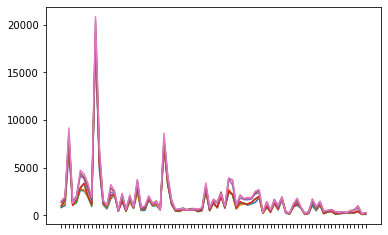

In [35]:
for ds1 in range(7):
    kgh1=newOne.iloc[:,0::7]
    x_ = kgh1.iloc[:,ds1:ds1+1].index
    y_ = kgh1.iloc[:,ds1:ds1+1].values



    ax = plt.plot(x_,y_)
    plt.xticks(rotation = 90)
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)


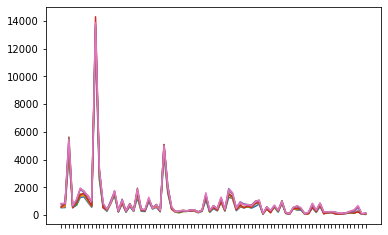

In [36]:

for ds2 in range(7):
    kgh2=newOne.iloc[:,1::7]
    x_ = kgh2.iloc[:,ds2:ds2+1].index
    y_ = kgh2.iloc[:,ds2:ds2+1].values



    ax = plt.plot(x_,y_)
    plt.xticks(rotation = 90)
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

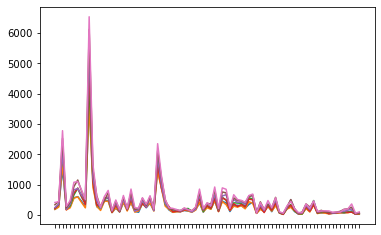

In [37]:

for ds3 in range(7):
    kgh3=newOne.iloc[:,2::7]
    x_ = kgh3.iloc[:,ds3:ds3+1].index
    y_ = kgh3.iloc[:,ds3:ds3+1].values



    ax = plt.plot(x_,y_)
    plt.xticks(rotation = 90)
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

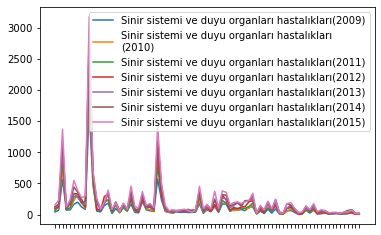

In [41]:

for ds2 in range(7):
    kgh4=newOne.iloc[:,3::7]
    x_ = kgh4.iloc[:,ds2:ds2+1].index
    y_ = kgh4.iloc[:,ds2:ds2+1].values



    ax = plt.plot(x_,y_,label=kgh4.columns[ds2])
    plt.legend()
    plt.xticks(rotation = 90)
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

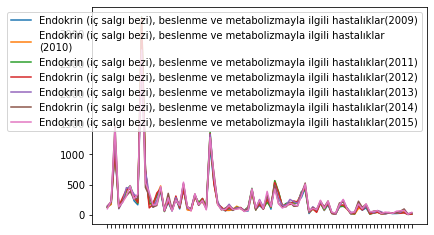

In [42]:

for ds2 in range(7):
    kgh5=newOne.iloc[:,4::7]
    x_ = kgh5.iloc[:,ds2:ds2+1].index
    y_ = kgh5.iloc[:,ds2:ds2+1].values



    ax = plt.plot(x_,y_,label=kgh5.columns[ds2])
    plt.xticks(rotation = 90)
    plt.legend()
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)


,Dışsal yaralanma nedenleri ve zehirlenmeler(2009),Dışsal yaralanma nedenleri ve zehirlenmeler\n(2010),Dışsal yaralanma nedenleri ve zehirlenmeler(2011),Dışsal yaralanma nedenleri ve zehirlenmeler(2012),Dışsal yaralanma nedenleri ve zehirlenmeler(2013),Dışsal yaralanma nedenleri ve zehirlenmeler(2014),Dışsal yaralanma nedenleri ve zehirlenmeler(2015),Dışsal yaralanma nedenleri ve zehirlenmeler(2016),Dışsal yaralanma nedenleri ve zehirlenmeler\n(2017)
cities,,,,,,,,,
Edirne,38,37,44,63,127,130,130,137,131
Çanakkale,80,61,71,161,197,216,185,194,199
İzmir,579,814,763,952,1237,1300,1219,1235,1176
Kırklareli,54,74,74,84,84,54,54,87,85
Tekirdağ,104,143,142,180,174,138,118,236,255
...,...,...,...,...,...,...,...,...,...
Kars,34,29,62,54,64,76,79,52,91
Ağrı,40,49,74,51,122,119,136,128,132
Van,71,52,91,71,132,144,147,164,226


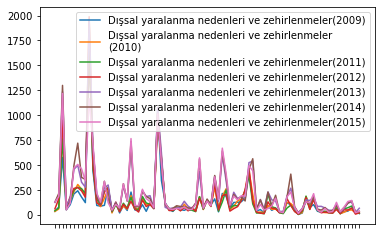

In [43]:

for ds2 in range(7):
    kgh6=newOne.iloc[:,5::7]
    x_ = kgh6.iloc[:,ds2:ds2+1].index
    y_ = kgh6.iloc[:,ds2:ds2+1].values



    ax = plt.plot(x_,y_,label=kgh6.columns[ds2])
    plt.legend()
    plt.xticks(rotation = 90)
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
newOne.iloc[:,5::7]

,Diğer(2009),Diğer\n(2010),Diğer(2011),Diğer(2012),Diğer(2013),Diğer(2014),Diğer(2015),Diğer(2016),Diğer\n(2017)
cities,,,,,,,,,
Edirne,210,223,240,274,250,286,312,358,407
Çanakkale,397,446,545,539,367,392,397,467,425
İzmir,2638,2858,3055,3514,2504,2598,2908,2834,2952
Kırklareli,242,274,289,291,238,236,284,257,327
Tekirdağ,481,479,475,556,500,625,677,650,734
...,...,...,...,...,...,...,...,...,...
Kars,127,137,196,179,319,273,244,242,165
Ağrı,199,278,275,213,301,324,339,333,312
Van,451,434,344,249,566,631,719,696,616


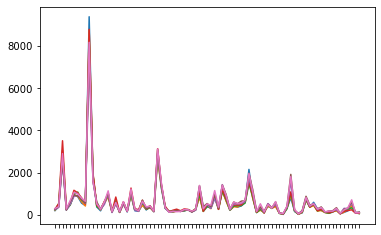

In [44]:

for ds2 in range(7):
    kgh7=newOne.iloc[:,6::7]
    x_ = kgh7.iloc[:,ds2:ds2+1].index
    y_ = kgh7.iloc[:,ds2:ds2+1].values



    ax = plt.plot(x_,y_)
    plt.xticks(rotation = 90)
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
newOne.iloc[:,6::7]

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

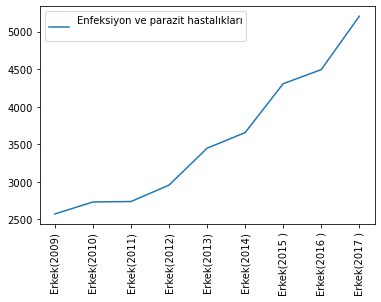

In [175]:
lastOne = data1.iloc[1:,1::3]
xexs = lastOne.iloc[0:0+1,:].columns
yexs = lastOne.iloc[0:0+1,:].values.reshape(9,)
plt.plot(xexs,yexs,label=lastOne.index[0])
plt.legend()
plt.xticks(rotation = 90)


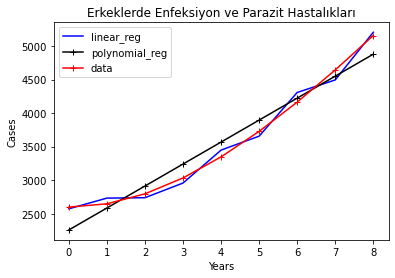

In [178]:
xexs =np.arange(xexs.shape[0]).reshape(-1, 1) 
yexs = yexs.reshape(-1, 1) 
lin_reg_next3 = LinearRegression()
lin_reg_next3.fit(xexs, yexs)

poly_reg_next3 = PolynomialFeatures(degree=3)
X_poly_next3 = poly_reg_next3.fit_transform(xexs)
pol_reg_next3 = LinearRegression()
pol_reg_next3.fit(X_poly_next3, yexs)
linear_pred_next3 = lin_reg_next3.predict(xexs)
poly_pred_next3 = pol_reg_next3.predict(poly_reg_next3.fit_transform(xexs))
plt.plot(xexs, yexs,c='b')
plt.plot(xexs, linear_pred_next3, '+-', color='black')
plt.plot(xexs, poly_pred_next3, '+-', color='red')
plt.title('Erkeklerde Enfeksiyon ve Parazit Hastalıkları')
plt.xlabel('Years')
plt.ylabel('Cases')
plt.legend(['linear_reg', 'polynomial_reg', 'data'])
plt.show()

Text(0, 0.5, 'Cases')

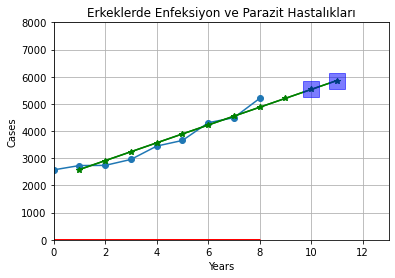

In [182]:
def linear_gradient(x, t, m, b):
    
    predicted = m * x + b          
    error = (predicted-t)          
    squared_error = error ** 2    
    grad = np.array([2 * error * x, 2 * error])
    return grad

m,b = np.random.uniform(-1, 1), np.random.uniform(-1, 1)
v = (m,b)




pred = m*xexs+b
plt.plot(xexs,yexs,'o-')
plt.plot(xexs,pred,'r-')

learning_rate = 0.01
for epoch in range(6000):
  
    grad = np.mean(linear_gradient(xexs, yexs, m,b),axis=1)
 
    v = (m,b)
    m,b = v - learning_rate*grad
 

x_future = 1+np.arange(yexs.shape[0]+2).reshape(-1, 1) 
p_future = m*x_future+b

plt.plot(x_future,p_future ,'g-*')
plt.plot(x_future[-2:],p_future[-2:],'bs', markersize=16, alpha=0.3)
plt.ylim([0,8000])
plt.xlim([0,13])
plt.grid()
plt.title('Erkeklerde Enfeksiyon ve Parazit Hastalıkları')
plt.xlabel('Years')
plt.ylabel('Cases')

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 11 Text major ticklabel objects>)

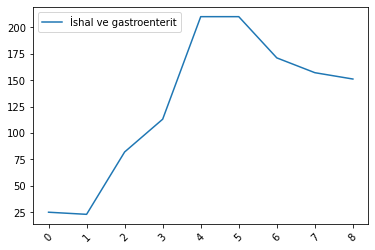

Text(0.5, 0, 'days')

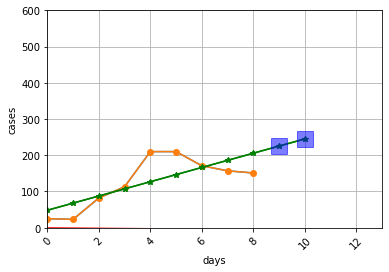

In [205]:
lastOne = data1.iloc[1:,1::3]
xexs =np.arange(xexs.shape[0]).reshape(-1, 1)
yexs = lastOne.iloc[1:1+1,:].values.reshape(9,)
plt.plot(xexs,yexs)

plt.xticks(rotation = 45)
m,b = np.random.uniform(-1, 1), np.random.uniform(-1, 1)
v = (m,b)

xexs =np.arange(xexs.shape[0]).reshape(-1, 1) 
yexs = yexs.reshape(-1, 1) 


pred = m*xexs+b
plt.plot(xexs,yexs,'o-')
plt.plot(xexs,pred,'r-')

learning_rate = 0.01
for epoch in range(6000):
    grad = np.mean(linear_gradient(xexs, yexs, m,b),axis=1)
  
    v = (m,b)
    m,b = v - learning_rate*grad
   # print(epoch, v)



x_future = np.arange(yexs.shape[0]+2).reshape(-1, 1) 
p_future = m*x_future+b

plt.plot(x_future,p_future ,'g-*')
plt.plot(x_future[-2:],p_future[-2:],'bs', markersize=16, alpha=0.3)
plt.ylim([0,600])
plt.xlim([0,13])
plt.grid()

plt.ylabel('cases')
plt.xlabel('days')


([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

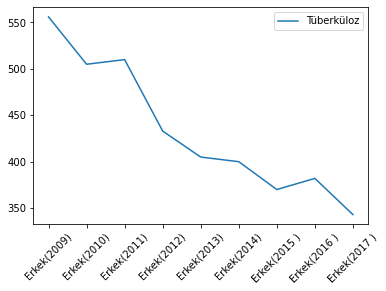

Text(0.5, 1.0, 'Tüberküloz')

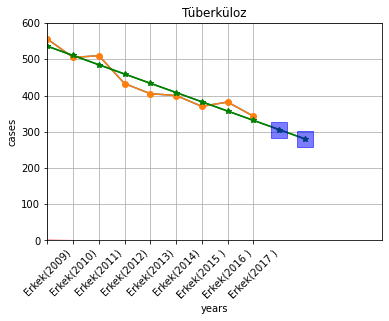

In [202]:
lastOne = data1.iloc[1:,1::3]
xexs = lastOne.iloc[2:2+1,:].columns
yexs = lastOne.iloc[2:2+1,:].values.reshape(9,)
plt.plot(xexs,yexs)

plt.xticks(rotation = 45)
m,b = np.random.uniform(-1, 1), np.random.uniform(-1, 1)
v = (m,b)


xexs =np.arange(xexs.shape[0]).reshape(-1, 1) 
yexs = yexs.reshape(-1, 1) 


pred = m*xexs+b
plt.plot(xexs,yexs,'o-')
plt.plot(xexs,pred,'r-')

learning_rate = 0.01
for epoch in range(6000):
  
    grad = np.mean(linear_gradient(xexs, yexs, m,b),axis=1)
  
    v = (m,b)
    m,b = v - learning_rate*grad
   # print(epoch, v)


x_future = np.arange(yexs.shape[0]+2).reshape(-1, 1) 
p_future = m*x_future+b

plt.plot(x_future,p_future ,'g-*')
plt.plot(x_future[-2:],p_future[-2:],'bs', markersize=16, alpha=0.3)
plt.ylim([0,600])
plt.xlim([0,13])
plt.grid()
plt.ylabel('cases')
plt.xlabel('years')
plt.title('Tüberküloz')

# Conclusion
- When we examined the data we have, we found that the highest number of deaths was in the range of 75 - 84 due to 'dolaşım sistemi hastalıkları' and in 2016.
- We found that the province with the highest death rate among diseases according to cities is Istanbul and this disease is again 'dolaşım sistemi hastalıkları'.
- When we examined on the basis of genders, we saw that the highest number of deaths in men was in 2009 and in women in 2017. We found that the cause of the two deaths was disease x.
- Among the diseases we examined, the maximum number of deaths in men, except for disease 'Dışsal yaralanma nedenleri ve zehirlenmeler', was always 65 years and above.
   This exception was seen between the ages of 25 and 35. In women, this rate is seen as over 65 years old.
- I observed that men consume more alcohol than women, and although this decreases with age, the truth does not change. But I cannot find any relationship between alcohol usage and rate of death
- As a result of tests, I have seen that the hypothesis claiming that men live longer than women is not true.
- Another hypothesis of mine was that death rates increase as you go to the east, and I observed that it is correct in the opposite direction through gyrafiks.
- I made predictions based on the disease that we can observe how these diseases will progress in the next few years in men.